<a href="https://colab.research.google.com/github/ShangZheTsai/NYUST-ML-final/blob/main/LDA(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
heart =pd.read_csv('/content/drive/MyDrive/final project/heart.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

X, y = heart.iloc[:, :-1].values, heart.iloc[:, -1].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train[:, :]

array([[56.,  1.,  2., ...,  1.,  1.,  1.],
       [54.,  1.,  0., ...,  1.,  1.,  3.],
       [63.,  1.,  0., ...,  1.,  1.,  3.],
       ...,
       [29.,  1.,  1., ...,  2.,  0.,  2.],
       [51.,  1.,  0., ...,  2.,  0.,  3.],
       [54.,  1.,  2., ...,  2.,  0.,  3.]])

In [ ]:
y_train[0:]

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1])

In [ ]:
y_train.shape

(227,)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[ 0.19302359,  0.63343079,  1.01360455, ..., -0.69770685,
         0.28012039, -2.11374084],
       [-0.02551185,  0.63343079, -0.95296154, ..., -0.69770685,
         0.28012039,  1.15033515],
       [ 0.95789763,  0.63343079, -0.95296154, ..., -0.69770685,
         0.28012039,  1.15033515],
       ...,
       [-2.75720485,  0.63343079,  0.0303215 , ...,  0.95207914,
        -0.71343162, -0.48170284],
       [-0.35331501,  0.63343079, -0.95296154, ...,  0.95207914,
        -0.71343162,  1.15033515],
       [-0.02551185,  0.63343079,  1.01360455, ...,  0.95207914,
        -0.71343162,  1.15033515]])

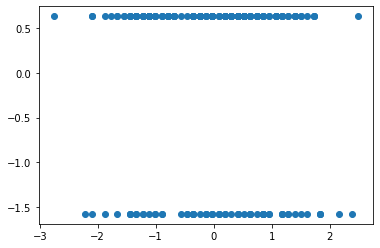

In [ ]:
plt.scatter(X_train_std[:,0], X_train_std[:,1])
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(0, 2):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label]))

MV 0: [ 0.2694  0.3113 -0.5138  0.1438  0.1443  0.0032 -0.1547 -0.4972  0.5266
  0.4672 -0.3774  0.3959  0.2947]

MV 1: [-0.2238 -0.2586  0.4268 -0.1195 -0.1198 -0.0027  0.1285  0.413  -0.4374
 -0.3881  0.3135 -0.3288 -0.2448]



In [ ]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.zeros((d, d))               # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)   # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                      # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [ ]:
S_W

array([[ 2.1331e+02, -3.0998e+01,  2.1012e+01,  5.6409e+01,  2.9044e+01,
         2.6715e+01, -1.3911e+01, -7.0139e+01,  5.1225e+00,  1.3407e+01,
        -1.2813e+01,  4.3394e+01,  3.4612e+00],
       [-3.0998e+01,  2.0873e+02,  1.4922e+01, -1.9004e+01, -3.4280e+01,
        -5.2758e-02, -3.8529e+00,  2.2601e+01,  3.0233e+00,  4.3262e-01,
         9.3348e+00,  9.0166e+00,  3.0305e+01],
       [ 2.1012e+01,  1.4922e+01,  1.7722e+02,  4.3031e+01, -6.2427e+00,
         3.0477e+01, -1.3560e+01,  1.7602e+01, -3.4398e+01,  1.7066e+01,
        -9.3634e-01,  3.2102e+00, -9.8557e+00],
       [ 5.6409e+01, -1.9004e+01,  4.3031e+01,  2.2310e+02,  3.1957e+01,
         4.0334e+01, -1.7206e+01,  4.3178e+00,  4.3816e-01,  2.5512e+01,
        -1.6158e+01,  2.3724e+00,  2.5985e+00],
       [ 2.9044e+01, -3.4280e+01, -6.2427e+00,  3.1957e+01,  2.2308e+02,
         1.6129e+01, -3.1201e+01,  1.3328e+01,  6.6577e+00,  1.4738e+00,
         1.0949e+01,  1.9245e+01,  1.8540e+01],
       [ 2.6715e+01, -5.2758e-

In [ ]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[0:])

Class label distribution: [103 124]


In [ ]:
d = 13  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [ ]:
S_W

array([[ 1.8630e+00, -2.6395e-01,  1.9077e-01,  5.0185e-01,  2.4774e-01,
         2.2368e-01, -1.2037e-01, -5.8608e-01,  3.6089e-02,  1.1683e-01,
        -1.0899e-01,  3.9452e-01,  1.7020e-02],
       [-2.6395e-01,  1.8020e+00,  1.3843e-01, -1.9813e-01, -3.1326e-01,
        -1.7551e-02, -5.3602e-02,  1.8414e-01,  5.5597e-03, -1.6278e-03,
         9.3685e-02,  7.2377e-02,  2.4116e-01],
       [ 1.9077e-01,  1.3843e-01,  1.5661e+00,  3.6817e-01, -6.2245e-02,
         2.5623e-01, -1.1021e-01,  1.7017e-01, -3.4760e-01,  1.3024e-01,
         8.8639e-03,  1.0794e-02, -1.0399e-01],
       [ 5.0185e-01, -1.9813e-01,  3.6817e-01,  2.0162e+00,  2.8768e-01,
         3.6945e-01, -1.3884e-01,  3.3579e-02,  2.0831e-02,  2.2134e-01,
        -1.5041e-01,  1.8819e-02,  2.7785e-02],
       [ 2.4774e-01, -3.1326e-01, -6.2245e-02,  2.8768e-01,  1.9817e+00,
         1.3508e-01, -2.5819e-01,  1.1962e-01,  7.7205e-02,  1.0207e-02,
         9.2829e-02,  1.8018e-01,  1.7994e-01],
       [ 2.2368e-01, -1.7551e-

In [ ]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)       # make column vector
    mean_overall = mean_overall.reshape(d, 1)   # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [ ]:
S_B

array([[ 8.9998e+00,  1.0399e+01, -1.7165e+01,  4.8046e+00,  4.8194e+00,
         1.0682e-01, -5.1682e+00, -1.6608e+01,  1.7591e+01,  1.5609e+01,
        -1.2606e+01,  1.3225e+01,  9.8449e+00],
       [ 1.0399e+01,  1.2015e+01, -1.9833e+01,  5.5513e+00,  5.5684e+00,
         1.2343e-01, -5.9715e+00, -1.9189e+01,  2.0324e+01,  1.8035e+01,
        -1.4565e+01,  1.5280e+01,  1.1375e+01],
       [-1.7165e+01, -1.9833e+01,  3.2738e+01, -9.1635e+00, -9.1918e+00,
        -2.0374e-01,  9.8572e+00,  3.1676e+01, -3.3550e+01, -2.9770e+01,
         2.4043e+01, -2.5223e+01, -1.8777e+01],
       [ 4.8046e+00,  5.5513e+00, -9.1635e+00,  2.5649e+00,  2.5728e+00,
         5.7028e-02, -2.7591e+00, -8.8662e+00,  9.3908e+00,  8.3329e+00,
        -6.7298e+00,  7.0600e+00,  5.2557e+00],
       [ 4.8194e+00,  5.5684e+00, -9.1918e+00,  2.5728e+00,  2.5808e+00,
         5.7204e-02, -2.7676e+00, -8.8936e+00,  9.4197e+00,  8.3585e+00,
        -6.7506e+00,  7.0818e+00,  5.2719e+00],
       [ 1.0682e-01,  1.2343e-

In [ ]:
print(np.linalg.matrix_rank(S_B))

1


In [ ]:
np.linalg.inv(S_W).dot(S_B)

array([[ 1.7624e+00,  2.0363e+00, -3.3614e+00,  9.4088e-01,  9.4378e-01,
         2.0919e-02, -1.0121e+00, -3.2524e+00,  3.4448e+00,  3.0567e+00,
        -2.4687e+00,  2.5898e+00,  1.9279e+00],
       [ 7.5344e+00,  8.7054e+00, -1.4370e+01,  4.0223e+00,  4.0346e+00,
         8.9430e-02, -4.3267e+00, -1.3904e+01,  1.4726e+01,  1.3067e+01,
        -1.0554e+01,  1.1071e+01,  8.2419e+00],
       [-1.1171e+01, -1.2907e+01,  2.1305e+01, -5.9634e+00, -5.9818e+00,
        -1.3259e-01,  6.4148e+00,  2.0614e+01, -2.1833e+01, -1.9374e+01,
         1.5647e+01, -1.6414e+01, -1.2220e+01],
       [ 3.5278e+00,  4.0761e+00, -6.7284e+00,  1.8833e+00,  1.8891e+00,
         4.1874e-02, -2.0259e+00, -6.5101e+00,  6.8952e+00,  6.1185e+00,
        -4.9414e+00,  5.1839e+00,  3.8591e+00],
       [ 1.6018e+00,  1.8508e+00, -3.0551e+00,  8.5514e-01,  8.5778e-01,
         1.9013e-02, -9.1987e-01, -2.9560e+00,  3.1309e+00,  2.7782e+00,
        -2.2437e+00,  2.3538e+00,  1.7523e+00],
       [-6.5148e-01, -7.5273e-

In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [ ]:
print(eigen_vecs)

[[-0.9744+0.j     -0.0913+0.j     -0.1004+0.1085j -0.1004-0.1085j
  -0.0238-0.0009j -0.0238+0.0009j  0.5972+0.j      0.5972-0.j
  -0.0083+0.j      0.8058+0.j      0.8058-0.j      0.8426+0.j
   0.8863+0.j    ]
 [ 0.0881+0.j     -0.3901+0.j      0.0395+0.0037j  0.0395-0.0037j
   0.5846+0.j      0.5846-0.j     -0.1655-0.0384j -0.1655+0.0384j
   0.2431+0.j     -0.1075+0.0401j -0.1075-0.0401j -0.1002+0.j
  -0.0875+0.j    ]
 [-0.1306+0.j      0.5784+0.j      0.8025+0.j      0.8025-0.j
   0.1702+0.2244j  0.1702-0.2244j  0.3913-0.1318j  0.3913+0.1318j
   0.4404+0.j      0.059 +0.1259j  0.059 -0.1259j  0.0594+0.j
   0.1007+0.j    ]
 [ 0.0412+0.j     -0.1827+0.j     -0.0804+0.0057j -0.0804-0.0057j
  -0.2055+0.1259j -0.2055-0.1259j -0.0417-0.2475j -0.0417+0.2475j
  -0.1944+0.j     -0.2443-0.0113j -0.2443+0.0113j  0.0442+0.j
  -0.019 +0.j    ]
 [ 0.0187+0.j     -0.0829+0.j      0.068 -0.067j   0.068 +0.067j
   0.0212-0.0831j  0.0212+0.0831j  0.0575-0.0283j  0.0575+0.0283j
   0.3225+0.j     -0.1738

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

85.12126814377774
7.184100137248875e-15
7.184100137248875e-15
5.106942994263145e-15
5.106942994263145e-15
2.349544201875602e-15
2.349544201875602e-15
1.8120560742823275e-15
8.803026465011154e-16
8.803026465011154e-16
9.097244116591103e-17
2.943655082572297e-17
0.0


In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.0913 -0.1004]
 [-0.3901  0.0395]
 [ 0.5784  0.8025]
 [-0.1827 -0.0804]
 [-0.0829  0.068 ]
 [ 0.0337 -0.0313]
 [ 0.1305 -0.0687]
 [ 0.3196 -0.0638]
 [-0.2791  0.1825]
 [-0.3267  0.2788]
 [ 0.1139 -0.1224]
 [-0.3506  0.0722]
 [-0.1547  0.2899]]


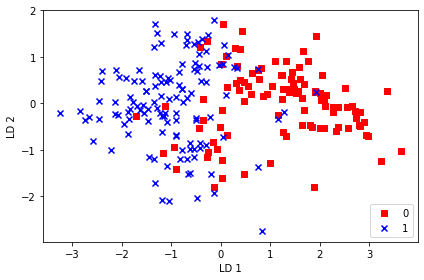

In [ ]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b']
markers = ['s', 'x']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)



In [ ]:
X_test_lda = X_test_std.dot(w)
from sklearn.metrics import accuracy_score, confusion_matrix
y_true = y_test
y_pred = lr.predict(X_test_lda)
accuracy_score(y_true, y_pred)
print(accuracy_score(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

0.7631578947368421
[[24 11]
 [ 7 34]]


In [ ]:
w1 = eigen_pairs[0][1][:, np.newaxis].real
print('Matrix W:\n', w1)

X_train_lda = X_train_std.dot(w1)

X_train_lda = np.reshape(X_train_lda, (len(X_train_lda),1))

Matrix W:
 [[-0.0913]
 [-0.3901]
 [ 0.5784]
 [-0.1827]
 [-0.0829]
 [ 0.0337]
 [ 0.1305]
 [ 0.3196]
 [-0.2791]
 [-0.3267]
 [ 0.1139]
 [-0.3506]
 [-0.1547]]


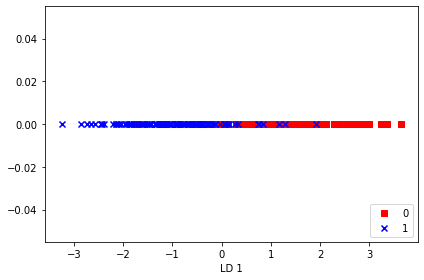

In [ ]:
X_train_lda = X_train_std.dot(w1)
colors = ['r', 'b']
markers = ['s', 'x']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1), np.zeros(len(X_train_lda[y_train == l, 0])),
          c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

X_test_lda = X_test_std.dot(w1)

from sklearn.metrics import accuracy_score, confusion_matrix
y_true = y_test
y_pred = lr.predict(X_test_lda)
print(accuracy_score(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

0.7631578947368421
[[24 11]
 [ 7 34]]
